In [1]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import math
import numpy as np
import sklearn
from sklearn.preprocessing import normalize
import librosa
import matplotlib.ticker as ticker
import qiskit

In [2]:
from qiskit import QuantumRegister, QuantumCircuit,execute, Aer
from qiskit.visualization import plot_histogram

## Circuit for extracting audio features using quantum Fourier transform.
**With direct reference to https://sarangzambare.github.io/jekyll/update/2020/06/13/quantum-frequencies.html by sarangzambare Published on Jun 13, 2020** 
- Based on amplitude encoding

In [39]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(np.pi/2**(n-qubit), qubit, n)
    #note the recursion
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    circuit.draw()
    return circuit

In [294]:
def prepare_circuit(samples, num_qubits,nor=True):

    num_amplitudes = len(samples)
    assert isPow2(num_amplitudes), 'len(amplitudes) should be power of 2'

    q = QuantumRegister(num_qubits)
    qc = QuantumCircuit(q)

    if normalize:
        ampls = samples / np.linalg.norm(samples)
    else:
        ampls = samples
    print(type(ampls[0])) 

    sum = 0
    for i in range(len(ampls)):
        sum+=np.square(ampls[i])
    print(sum)   
    
    qc.initialize(ampls, [q[i] for i in range(num_qubits)])

    return qc

In [295]:
def Log2(x):
    return (math.log10(x) / math.log10(2))

def isPow2(samples):
    return (math.ceil(samples) == math.floor(samples))

## Example 1: 

2048


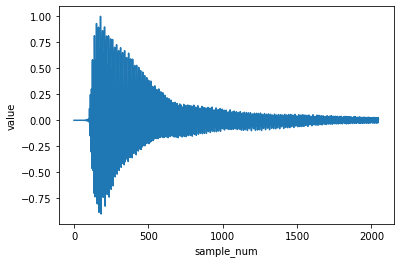

In [407]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/guitar-a/371135__guitar-a.wav', sr=1500,dtype='float64')
signal = sound[200:n_samples+200]
signal=signal/abs(max(signal))
print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

In [408]:
# prepare circuit
qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
qcs.draw()

<class 'numpy.float64'>
0.9999999999999997


»
  q93_0: »
         »
  q93_1: »
         »
  q93_2: »
         »
  q93_3: »
         »
  q93_4: »
         »
  q93_5: »
         »
  q93_6: »
         »
  q93_7: »
         »
  q93_8: »
         »
  q93_9: »
         »
 q93_10: »
         »
 meas_0: »
         »
 meas_1: »
         »
 meas_2: »
         »
 meas_3: »
         »
 meas_4: »
         »
 meas_5: »
         »
 meas_6: »
         »
 meas_7: »
         »
 meas_8: »
         »
 meas_9: »
         »
meas_10: »
         »
«         ┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

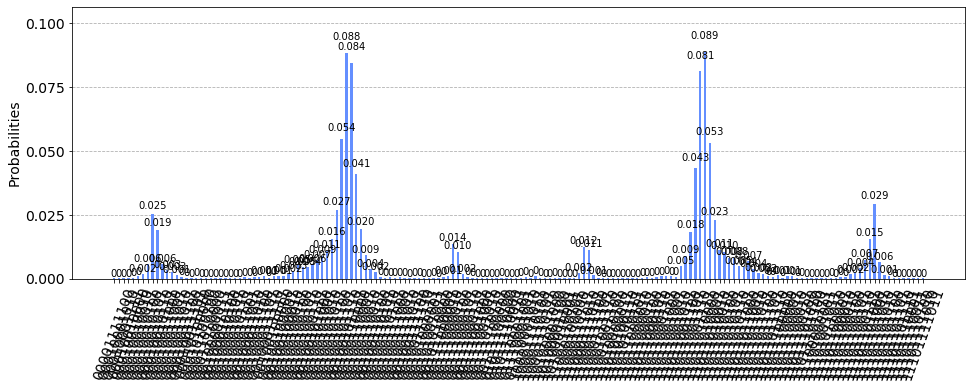

In [409]:
qasm_backend = Aer.get_backend('qasm_simulator')
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
plot_histogram(counts,figsize=(16, 5))

In [410]:
def get_fft_from_counts(counts,n_qubits):
    decimalcounts={}
    for k,v in counts.items():
        decimalcounts[str(int(k,2))]=v
    sorted_items={k: v for k, v in sorted(decimalcounts.items(), key=lambda item: int(item[0]))}
    half_counts = {key: value for key, value in sorted_items.items() if int(key) <len(signal)//2 }
    for i in range(0,len(signal)//2):
        if str(i) in half_counts.keys():
            continue
        else:
            half_counts[str(i)]=0
    sorted_half={k: v for k, v in sorted(half_counts.items(), key=lambda item: int(item[0]))}
    fft={}
    print(len(sorted_half))
    """for k,v in sorted_half.items():
        print(k)
    for k,v in sorted_half.items():
        fft[int(k)-len(samples)//2]=v"""
    return(sorted_half)

In [411]:
def plot_samples(samples):
    x, y = zip(*samples.items())
    fre=[]
    for i in x:
        x_i = int(i)*sampFreq/n_samples
        fre.append(x_i)
    tick_spacing = 50
    fig, ax = plt.subplots(1,1)
    ax.plot(fre, y)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.show()

1024


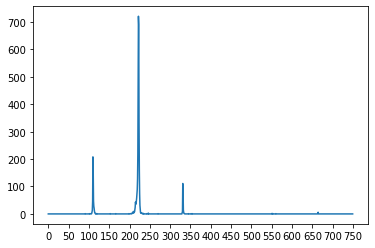

1024


In [412]:
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
amplitude=[]
for i in fft.values():
    amplitude.append(i/8192)
print(len(amplitude))

In [413]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([221.92382812, 222.65625   , 221.19140625, 223.38867188,
       220.45898438])

# Training Data

2048


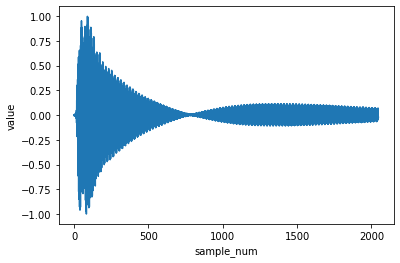

In [564]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/piano-c5/148431_piano-c5.wav', sr=1500,dtype='float64')
signal = sound[:n_samples]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

In [565]:
qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
qcs.draw()

<class 'numpy.float64'>
0.9999999999999987


»
 q7475_0: »
          »
 q7475_1: »
          »
 q7475_2: »
          »
 q7475_3: »
          »
 q7475_4: »
          »
 q7475_5: »
          »
 q7475_6: »
          »
 q7475_7: »
          »
 q7475_8: »
          »
 q7475_9: »
          »
q7475_10: »
          »
  meas_0: »
          »
  meas_1: »
          »
  meas_2: »
          »
  meas_3: »
          »
  meas_4: »
          »
  meas_5: »
          »
  meas_6: »
          »
  meas_7: »
          »
  meas_8: »
          »
  meas_9: »
          »
 meas_10: »
          »
«          ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

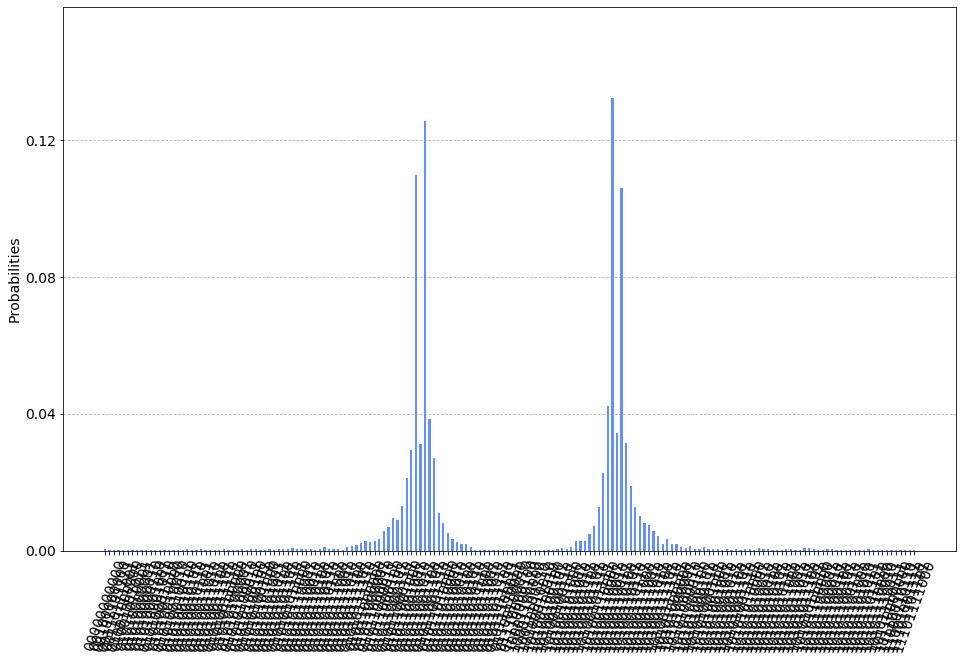

In [586]:
out = execute(qcs, qasm_backend, shots=8192)
counts = out.result().get_counts()
plot_histogram(out.result().get_counts(),figsize=(16,10), bar_labels =False)


1024


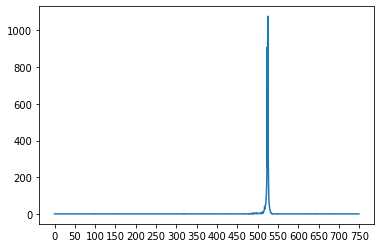

In [489]:
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am148431=[]
for i in fft.values():
    am148431.append(i)
am148431=normalize([am148431])

In [490]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([525.14648438, 523.68164062, 525.87890625, 524.4140625 ,
       522.94921875])

2048
<class 'numpy.float64'>
0.9999999999999988
1024


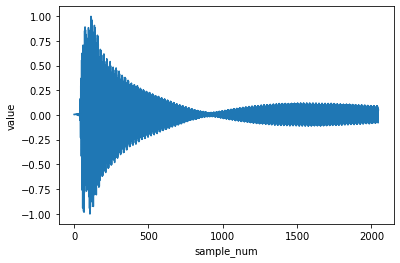

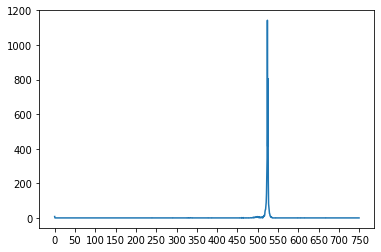

In [385]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/piano-c5/316082_piano-c5.aiff', sr=1500,dtype='float64')
signal = sound[600:n_samples+600]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)


qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()

out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()

fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)


am316082=[]
for i in fft.values():
    am316082.append(i)
am316082=normalize([am316082])

In [418]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([525.14648438, 523.68164062, 525.87890625, 524.4140625 ,
       522.94921875])

2048
<class 'numpy.float64'>
0.9999999999999991
1024


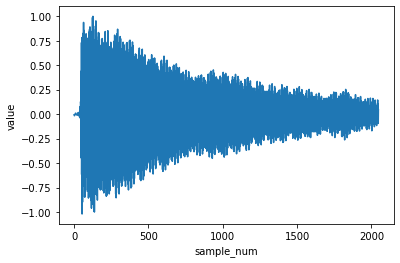

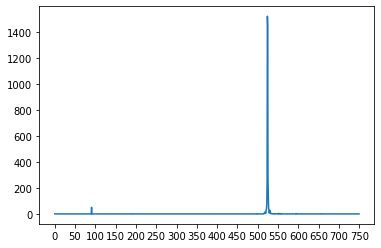

In [420]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/piano-c5/334537_piano_c5.wav', sr=1500,dtype='float64')
signal = sound[150:n_samples+150]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()

fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am334537=[]

for i in fft.values():
    am334537.append(i)
am334537=normalize([am334537])

In [421]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([523.68164062, 524.4140625 , 525.14648438, 522.94921875,
       525.87890625])

2048


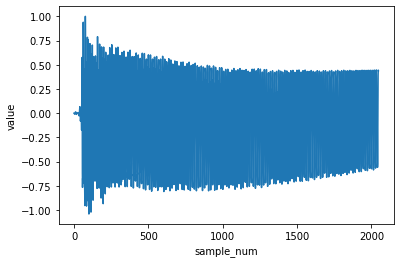

In [423]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/guitar-a/8382__guitar-a-pick.wav', sr=1500,dtype='float64')
signal = sound[:n_samples]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

<class 'numpy.float64'>
0.9999999999999988
1024


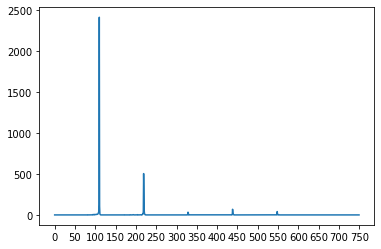

In [424]:
qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
plot_histogram(counts,figsize=(16, 5))
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am8382=[]
for i in fft.values():
    am8382.append(i/8192)
am8382=normalize([am8382])

In [425]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([109.86328125, 218.99414062, 219.7265625 , 109.13085938,
       110.59570312])

2048
<class 'numpy.float64'>
1.0000000000000004
1024


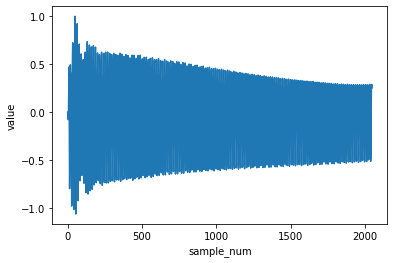

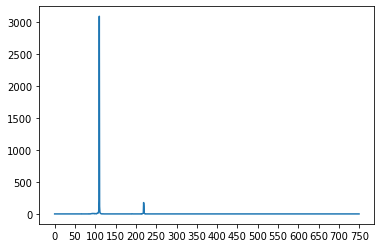

In [428]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/guitar-a/8383__guitar-a-pluck.wav', sr=1500,dtype='float64')
signal = sound[:n_samples]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
plot_histogram(counts,figsize=(16, 5))
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am8383=[]
for i in fft.values():
    am8383.append(i/8192)
am8383=normalize([am8383])

In [429]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([109.86328125, 109.13085938, 218.99414062, 219.7265625 ,
       110.59570312])

2048
<class 'numpy.float64'>
1.000000000000002
1024


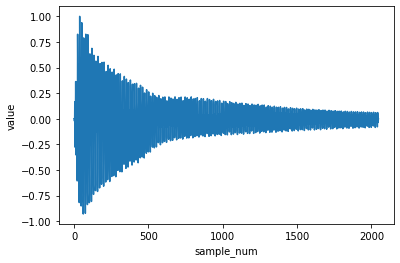

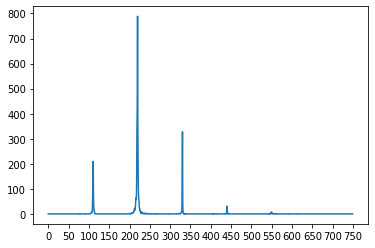

In [430]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/guitar-a/361576__guitar-a.wav', sr=1500,dtype='float64')
signal = sound[:n_samples]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
plot_histogram(counts,figsize=(16, 5))
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am361576=[]
for i in fft.values():
    am361576.append(i/8192)
am361576=normalize([am361576])

In [431]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([219.7265625 , 218.99414062, 220.45898438, 218.26171875,
       330.32226562])

# Test Data

2048
<class 'numpy.float64'>
1.0000000000000002
1024


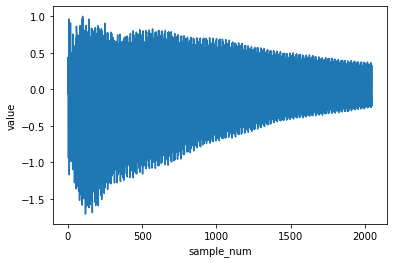

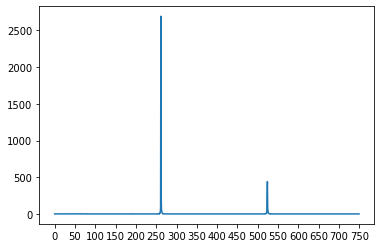

In [442]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/piano-c5/505410_piano-c5.wav', sr=1500,dtype='float64')
signal = sound[:n_samples]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
plot_histogram(counts,figsize=(16, 5))
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)

am505410=[]
for i in fft.values():
    am505410.append(i/8192)
am505410=normalize([am505410])

In [443]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([261.47460938, 523.68164062, 262.20703125, 522.94921875,
       524.4140625 ])

2048
<class 'numpy.float64'>
1.0000000000000007
1024


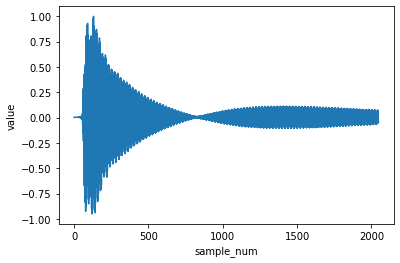

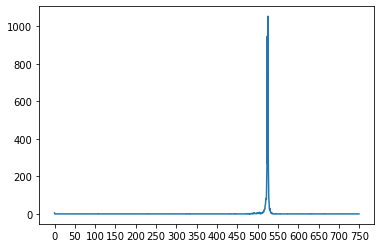

In [446]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/piano-c5/485912_piano-c5.wav', sr=1500,dtype='float64')
signal = sound[300:n_samples+300]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
plot_histogram(counts,figsize=(16, 5))
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am485912=[]
for i in fft.values():
    am485912.append(i/8192)
am485912=normalize([am485912])

In [447]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([525.14648438, 523.68164062, 525.87890625, 524.4140625 ,
       522.94921875])

2048
<class 'numpy.float64'>
0.999999999999999
1024


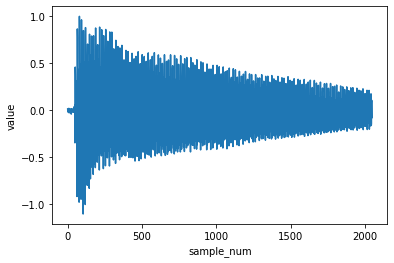

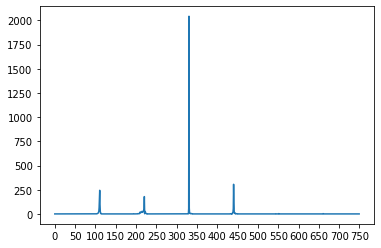

In [449]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/guitar-a/117673__guitar-a.wav', sr=1500,dtype='float64')
signal = sound[100:n_samples+100]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
plot_histogram(counts,figsize=(16, 5))
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am117673=[]
for i in fft.values():
    am117673.append(i/8192)
am117673=normalize([am117673])

In [450]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([330.32226562, 440.18554688, 110.59570312, 220.45898438,
       109.86328125])

2048
<class 'numpy.float64'>
0.9999999999999997
1024


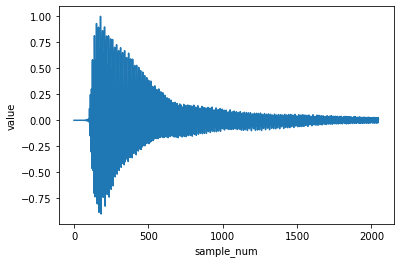

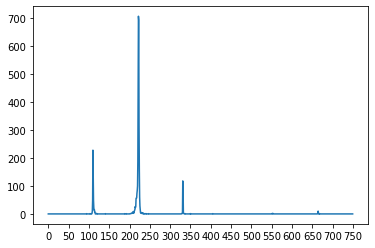

In [452]:
n_qubits = 11
n_samples=2**n_qubits

sound,sampFreq= librosa.load('sound_sample/guitar-a/371135__guitar-a.wav', sr=1500,dtype='float64')
signal = sound[200:n_samples+200]
signal=signal/abs(max(signal))

print(len(signal))
plt.xlabel('sample_num')
plt.ylabel('value')
plt.plot(list(range(len(signal))), signal)

qcs=prepare_circuit(signal,n_qubits)
qft(qcs, n_qubits)
qcs.measure_all()
out = execute(qcs, qasm_backend, shots=8192).result()
counts = out.get_counts()
fft = get_fft_from_counts(counts, n_qubits)
plot_samples(fft)
am371135=[]
for i in fft.values():
    am371135.append(i/8192)
am371135=normalize([am371135])


In [453]:
top_indices = np.argsort(-np.array(list(fft.values())))
freqs = top_indices*sampFreq/n_samples
# get top 5 detected frequencies
freqs[:5]

array([221.92382812, 222.65625   , 221.19140625, 223.38867188,
       109.86328125])

In [455]:
traindata=[]
traindata.append(np.array(am148431[0]))
traindata.append(np.array(am316082[0]))
traindata.append(np.array(am334537[0]))
traindata.append(np.array(am8382[0]))
traindata.append(np.array(am8383[0]))
traindata.append(np.array(am361576[0]))
print(traindata)

[array([0.00200068, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0.00515847, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]


In [466]:
train_normalized = sklearn.preprocessing.normalize(traindata)
print(train_normalized)

[[0.00200068 0.         0.         ... 0.         0.         0.        ]
 [0.00515847 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [456]:
testdata=[]
testdata.append(am505410[0])
testdata.append(am485912[0])
testdata.append(am117673[0])
testdata.append(am371135[0])
print(testdata)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0.00324623, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]


In [501]:
test_normalized = sklearn.preprocessing.normalize(testdata)
print(test_normalized)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00324623 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [521]:
print(am505410[0])

[0. 0. 0. ... 0. 0. 0.]


In [500]:
train_labels=np.array([0,0,0,1,1,1])

# Swap test for calculate similarity between two audio samples

In [667]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

qasm_backend = Aer.get_backend('qasm_simulator')

num_qubits = 10
n_samples=2**n_qubits

qr = QuantumRegister(num_qubits*2+1)
cr = ClassicalRegister(1, name="cr")
qc = QuantumCircuit(qr, cr, name="swap_test")


qc.h(qr[0])

qc.initialize(am371135[0], [qr[i] for i in range(1,num_qubits+1)])
qc.initialize(am361576[0], [qr[i] for i in range(num_qubits+1,2*num_qubits+1)])

qc.cswap(qr[0], qr[1], qr[num_qubits+1])
qc.cswap(qr[0], qr[2], qr[num_qubits+2])
qc.cswap(qr[0], qr[3], qr[num_qubits+3])
qc.cswap(qr[0], qr[4], qr[num_qubits+4])
qc.cswap(qr[0], qr[5], qr[num_qubits+5])
qc.cswap(qr[0], qr[6], qr[num_qubits+6])
qc.cswap(qr[0], qr[7], qr[num_qubits+7])
qc.cswap(qr[0], qr[8], qr[num_qubits+8])
qc.cswap(qr[0], qr[9], qr[num_qubits+9])
qc.cswap(qr[0], qr[10], qr[num_qubits+10])

qc.h(qr[0])

qc.measure(qr[0], cr[0])
qc.draw()

»
 q7513_0: »
          »
 q7513_1: »
          »
 q7513_2: »
          »
 q7513_3: »
          »
 q7513_4: »
          »
 q7513_5: »
          »
 q7513_6: »
          »
 q7513_7: »
          »
 q7513_8: »
          »
 q7513_9: »
          »
q7513_10: »
          »
q7513_11: »
          »
q7513_12: »
          »
q7513_13: »
          »
q7513_14: »
          »
q7513_15: »
          »
q7513_16: »
          »
q7513_17: »
          »
q7513_18: »
          »
q7513_19: »
          »
q7513_20: »
          »
    cr_0: »
          »
«                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       »
« q7513_0: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

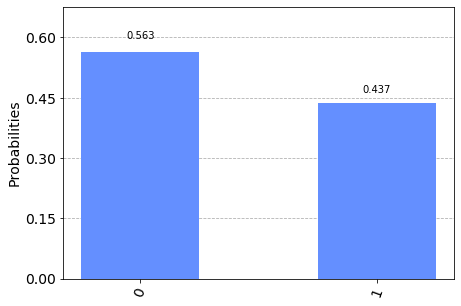

In [668]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
plot_histogram(job.result().get_counts())

**Given two quantum state a and b:  
P[obs = |0>]=1/2+1/2||<a|b>||²**

||<a|b>||² is obtained for being used in the next step: finding N nearest points. ( In this project, classical method is being used)**

In [672]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.1',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.2'}